DAILY COUNT OF AGGREGATED TOPIC KEYWORDS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_daily_count = pd.read_csv('F:/WB/Issue Monitoring/data/gdelt_daily_keyword_count.csv')

df_daily_count = df_daily_count[(df_daily_count['date']>='2020-03-23')].reset_index(drop=True)
# df_daily_count = df_daily_count[~(df_daily_count['date'].isin(['2020-04-22','2020-04-23']))].reset_index(drop=True)

In [3]:
len(df_daily_count['date'].unique())

64

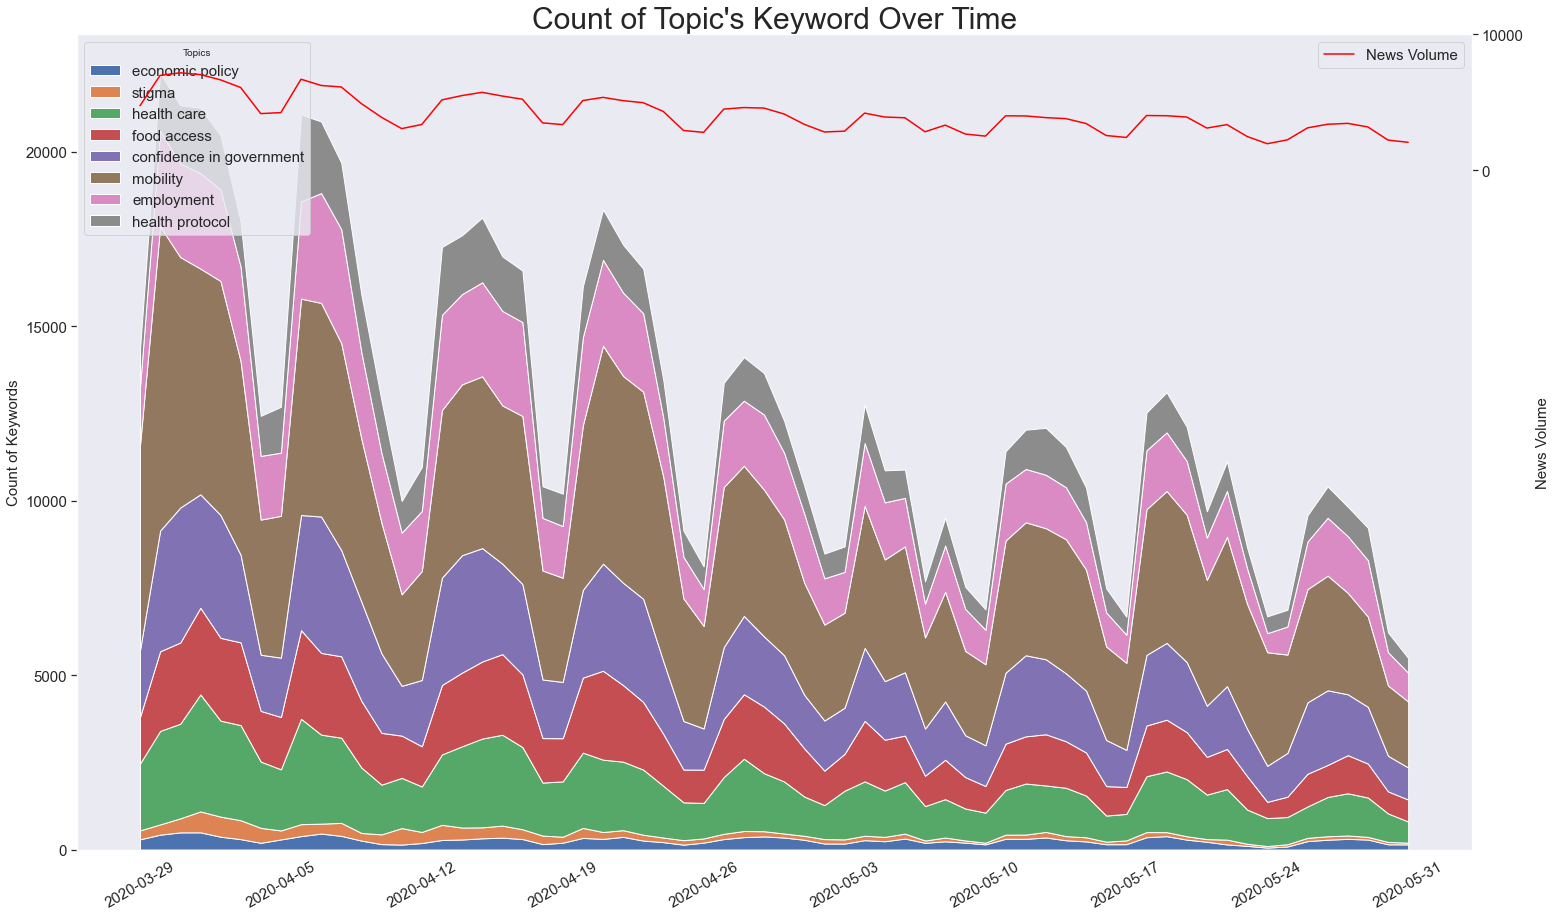

In [7]:
legend = []
yy = []
for topic in list(df_daily_count['topic'].unique()):
    df_temp = df_daily_count[df_daily_count.topic==topic]
    # df_temp = df_temp[df_temp.week_of_the_year>=6].reset_index(drop=True)
    # df_temp['week_of_the_year'] = df_temp['week_of_the_year'].replace({6:'Feb 2nd Week',7:'Feb 3rd Week',8:'Feb 4th Week',9:'Feb 5th Week / Mar 1st Week',10:'Mar 2nd Week',11:'Mar 3rd Week',12:'Mar 4th Week',13:'Mar 5th Week',14:'Mar 6th Week / Apr 1st Week',15:'Apr 2nd Week',16:'Apr 3rd Week'})
    legend.append(topic)
    yy.append(df_temp['count'].to_list())

x = df_temp['date'].to_list()
y = np.vstack(yy)
fig, ax1 = plt.subplots(figsize=(25,15))
plt.title("Count of Topic's Keyword Over Time",fontsize=30)
ax1.stackplot(x, y, labels=legend)

ax2 = ax1.twinx()
ax2.plot(x,df_daily_count[df_daily_count.topic=='economic policy']['tweets_volume'].to_list(),color='red')

ax1.grid()
ax2.grid(False)
ax1.set_ylabel('Count of Keywords',fontsize=15)
ax1.tick_params(axis='x', rotation=30,labelsize=15)
ax1.tick_params(axis='y',labelsize=15)
ax1.legend(legend,loc='upper left',title="Topics",fancybox=True,fontsize=15)
xticks = ax1.xaxis.get_major_ticks()
remove_date = [i for i in range(64) if i not in [0,7,14,21,28,35,42,49,56,63]]
for i in remove_date:
    xticks[i].set_visible(False)
ax2.set_ylabel('News Volume',fontsize=15)
ax2.set_ylim([-50000,10000])
ax2.tick_params(axis='y',labelsize=15)
yticks = ax2.yaxis.get_major_ticks()
yticks[0].set_visible(False)
yticks[1].set_visible(False)
yticks[2].set_visible(False)
yticks[3].set_visible(False)
yticks[4].set_visible(False)
ax2.legend(['News Volume'],loc='upper right',fontsize=15)
plt.xlabel('Date')
plt.show()
fig.savefig('chart_output/gdelt_daily_keyword_count.png', dpi=fig.dpi)